In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# irgend eine config 
%matplotlib inline


# Dataset
pokemon_dataset = pd.read_csv('../data/pokedex_420.csv')

pkmn_global = pokemon_dataset.drop(['Unnamed: 0', 'name', 'japanese_name', 'catch_rate', 'base_experience',
                                    'base_friendship', 'growth_rate', 'egg_cycles', 'egg_type_1', 'egg_type_2',
                                    'egg_type_number', 'percentage_male'], axis=1)

df = pkmn_global[pkmn_global['generation'] <= 3]
df = df[~df.duplicated(keep="last", subset='german_name')]
df.columns

Index(['pokedex_number', 'german_name', 'generation', 'is_sub_legendary',
       'is_legendary', 'is_mythical', 'species', 'type_number', 'type_1',
       'type_2', 'height_m', 'weight_kg', 'abilities_number', 'ability_1',
       'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

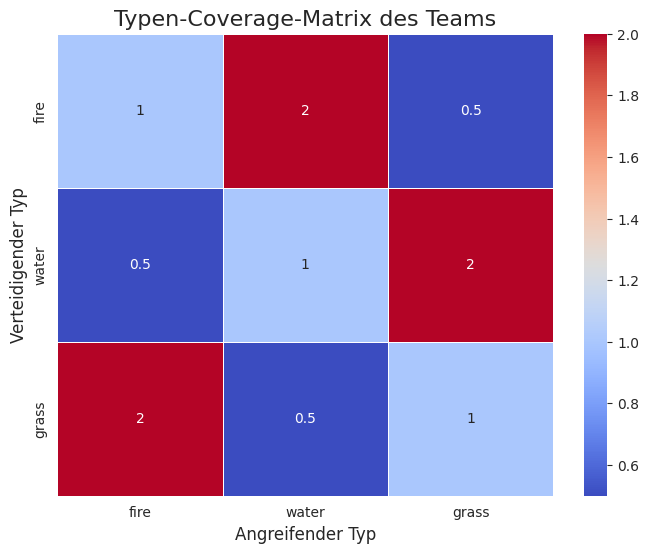

In [10]:
# Typen-Coverage-Matrix / Heatmap
coverage_data = {
    'fire': [1, 0.5, 2],
    'water': [2, 1, 0.5],
    'grass': [0.5, 2, 1],
}
coverage_df = pd.DataFrame(coverage_data, index=['fire', 'water', 'grass'])

plt.figure(figsize=(8, 6))
sns.heatmap(coverage_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Typen-Coverage-Matrix des Teams', fontsize=16)
plt.xlabel('Angreifender Typ', fontsize=12)
plt.ylabel('Verteidigender Typ', fontsize=12)
plt.show()


In [13]:
# Typenstärken-Matrix ( Heatmap )
type_effectiveness = {
    'rock': {'water': 2, 'grass': 2, 'fire': 0.5, 'normal': 1},
    'fire': {'water': 0.5, 'grass': 2, 'fire': 0.5, 'normal': 1},
}
effectiveness_df = pd.DataFrame(type_effectiveness)

plt.figure(figsize=(8, 6))
sns.heatmap(effectiveness_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Typenstärken gegen Gesteins-Pokémon', fontsize=16)
plt.xlabel('Angreifender Typ', fontsize=12)
plt.ylabel('Verteidigender Typ', fontsize=12)
plt.show()

,pokedex_number,german_name,generation,is_sub_legendary,is_legendary,is_mythical,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bisasam,1,0,0,0,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.00,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Bisaknosp,1,0,0,0,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.00,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Bisaflor,1,0,0,0,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.00,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Glumanda,1,0,0,0,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,0.5,0.5
5,5,Glutexo,1,0,0,0,Flame Pokémon,1,Fire,NaN,...,2.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,382,Kyogre,3,0,1,0,Sea Basin Pokémon,1,Water,NaN,...,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,1.0
456,383,Groudon,3,0,1,0,Continent Pokémon,2,Ground,Fire,...,2.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,0.5,0.5
458,384,Rayquaza,3,0,1,0,Sky High Pokémon,2,Dragon,Flying,...,0.0,1.0,1.00,0.5,1.0,1.0,2.0,1.0,1.0,2.0
459,385,Jirachi,3,0,0,1,Wish Pokémon,2,Steel,Psychic,...,2.0,0.5,0.25,1.0,0.5,2.0,0.5,2.0,0.5,0.5
